# Đồ án cuối kỳ

**Các thành viên:**
1. MSSV: 1712496 - Họ tên: Nguyễn Trần Công Huy
2. MSSV: 1712556 - Họ tên: Hoàng Huy Lịch

---

## Import thư viện

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

---

## Thu thập dữ liệu

Trong đồ án lần này, nhóm em sẽ sử dụng dữ liệu đã được thu thập sẵn là file "*data.csv*"; đây là dữ liệu về số lượng người tự tử thống kê theo từng năm trên từng quốc gia từ 1985 đến 2016. <br>
Dữ liệu này đã được public trên [Kaggle](https://www.kaggle.com/), gốc ở [đây](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). <br>
Tập dữ liệu này được merged từ 4 nguồn khác nhau với key là thời gian và vị trí địa lý, lần lượt gồm:
- [United Nations Development Program. (2018). Human development index (HDI)](http://hdr.undp.org/en/indicators/137506).
- [World Bank. (2018). World development indicators: GDP (current US$\$$) by country: 1985 to 2016](http://databank.worldbank.org/data/source/world-development-indicators#).
- [[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook).
- [World Health Organization. (2018). Suicide prevention](https://www.who.int/health-topics/suicide).

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file .csv vào Dataframe

In [56]:
suicide_df = pd.read_csv('data.csv')
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Dữ liệu gồm bao nhiêu dòng và cột?

In [57]:
num_rows, num_cols = suicide_df.shape
print(f'Bộ dữ liệu có {num_rows} dòng và {num_cols} cột')

Bộ dữ liệu có 27820 dòng và 12 cột


### Mỗi dòng có ý nghĩa gì?  Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng tượng trưng cho một nhóm người được chia theo độ tuổi thống kê tại một quốc gia ở một thời điểm nhất định với các thông tin (có thể) liên quan tới số lượng người tự tử trong nhóm ấy.

### Dữ liệu có các dòng bị lặp không?

In [58]:
have_duplicated_rows = any(suicide_df.duplicated())
have_duplicated_rows

False

### Mỗi cột có ý nghĩa gì?

Mô tả ý nghĩa các cột trong dữ liệu này: <br>
- **country**: tên của quốc gia.
- **year**: năm đang xét.
- **sex**: giới tính.
- **age**: nhóm độ tuổi.
- **suicides_no**: số lượng người tự tử trong nhóm này.
- **population**: tổng số người thống kê được trong nhóm này.
- **suicides/100k pop**: số lượng người tự tử trong 100.000 người .
- **country-year**: tên của quốc gia + năm.
- **HDI for year**: chỉ số HDI (human development index) trong năm của nhóm này.
- **gdp_for_year ($\$$)**: GDP trong năm của nhóm này.
- **gdp_per_capita ($\$$)**: GDP bình quân đầu người của nhóm này.
- **generation**: thế hệ của nhóm này.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [59]:
col_dtypes = suicide_df.dtypes
col_dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

**Cột có dtype là object nghĩa là sao?**

`suicide_df` có 4 cột có `dtype` là `object` gồm: 'country', 'sex', 'age', 'country-year' và 'generation', ta cần tìm xem kiểu dữ liệu thật của các cột này là gì.

In [60]:
def get_type(e):
    return type(e[0])


def open_object_dtype(s):
    dtypes = set()
    dtypes.update(np.apply_along_axis(get_type, 1, s.values[:, np.newaxis]))
    return dtypes


object_type_columns = np.array(
    ['country', 'sex', 'age', 'country-year', 'generation'])
for col in object_type_columns:
    print(f"Cột '{col}' có kiểu: {open_object_dtype(suicide_df[col])}")

Cột 'country' có kiểu: {<class 'str'>}
Cột 'sex' có kiểu: {<class 'str'>}
Cột 'age' có kiểu: {<class 'str'>}
Cột 'country-year' có kiểu: {<class 'str'>}
Cột 'generation' có kiểu: {<class 'str'>}


Vậy không có cột nào có tình trạng hỗn hợp nhiều kiểu dữ liệu.

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

Ta có 7 cột thuộc nhóm numeric gồm: 'year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_for_year (\\$)' và 'gdp_per_capita (\\$)'.
Trong mục này, ta sẽ tìm tỉ lệ thiếu sót, giá trị max và min trên từng cột nói trên.

In [61]:
numeric_columns = np.array([
    'year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year',
    ' gdp_for_year ($) ', 'gdp_per_capita ($)'
])


def missing_ratio(numerics):
    return numerics.isna().mean() * 100


numeric_df = suicide_df[numeric_columns]
nume_col_profiles_df = numeric_df.agg(
    [missing_ratio, pd.Series.min, pd.Series.max])
nume_col_profiles_df

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
missing_ratio,0.0,0.0,0.0,0.00,69.935298,0,0.0
min,1985.0,0.0,278.0,0.00,0.483000,"1,002,219,052,968",251.0
max,2016.0,22338.0,43805214.0,224.97,0.944000,"997,007,926",126352.0


Cột 'HDI for year' có tỉ lệ giá trị thiếu khá cao, đáng xem xét để được loại bỏ.

---

### Với mỗi cột có kiểu dữ liệu phân loại (categorical), các giá trị được phân bố như thế nào?

Ta có 5 cột thuộc nhóm categorical gồm: 'country', 'sex', 'age', 'country-year' và 'generation'.
Trong mục này, ta sẽ tìm tỉ lệ thiếu sót,  số lượng giá trị khác nhau, list/array các giá trị khác nhau của các cột nói trên.

In [62]:
categorical_columns = np.array([ 'country', 'sex', 'age', 'country-year', 'generation'])
categorical_df = suicide_df[categorical_columns]
cate_col_profiles_df = categorical_df.agg(
    [missing_ratio, pd.Series.nunique, pd.Series.unique])
cate_col_profiles_df.rename(index={
    'nunique': 'num_diff_vals',
    'unique': 'diff_vals'
}, inplace=True)
cate_col_profiles_df

,country,sex,age,country-year,generation
missing_ratio,0,0,0,0,0
num_diff_vals,101,2,6,2321,6
diff_vals,"[Albania, Antigua and Barbuda, Argentina, Arme...","[male, female]","[15-24 years, 35-54 years, 75+ years, 25-34 ye...","[Albania1987, Albania1988, Albania1989, Albani...","[Generation X, Silent, G.I. Generation, Boomer..."


Các cột này có vẻ không xảy ra vấn đề gì, tuy nhiên như có thể thấy, cột 'country-year' chỉ là một chuỗi kết hợp giữa giá trị từ cột 'country' và cột 'year', không đem lại nhiều ý nghĩa, nên xem xét để được loại bỏ.

## Tiền xử lý

### Đổi tên 2 cột gdp_for_year và gdp_per_capita cho phù hợp

In [63]:
suicide_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'},inplace=True)
#suicide_df.rename(columns={'gdp_for_year ($)':'gdp_for_year'},inplace=True)
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Loại bỏ cột 'HDI for year' và cột 'country-year'

In [64]:
dropping_columns = np.array(['HDI for year','country-year'])
suicide_df.drop(columns=dropping_columns, inplace=True)
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


## Các câu hỏi có ý nghĩa

**Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:**
1. Xu hướng tăng giảm của tỉ lệ tự tử trên từng quốc gia như thế nào đồng thời chỉ ra những quốc gia đứng top trending? <br>
 => Cung cấp cho những người có nhu cầu nhập cư nước ngoài một nguồn thông tin tham khảo các quốc gia có tiềm năng với tỉ lệ tự tử thấp, bởi lẽ những quốc gia có tỉ lệ này ngày càng tăng chắc chắn có vấn đề.
2. Liệu giàu có có giúp giảm tỷ lệ tự tử không? <br>
=> Phát triển lành mạnh hơn ( ví dụ tăng lương, giảm giờ làm).

3. Giới tính nào có xu hướng tự tử nhiều hơn và nếu hơn thì hơn bao nhiêu lần? <br>
=> Giúp chúng ta có những giúp đỡ vè mặt tâm lý phù hợp hơn với đối tượng giới tính đó.

## Khám phá dữ liệu (tiếp tục)

In [68]:
def draw_graph(num_countries, country_df, countries, fig_title):
    n_rows, n_cols = int(math.ceil(num_countries/3)), 3
    fig, ax = plt.subplots(n_rows,n_cols, figsize=(15,15))
    colors = np.random.rand(num_countries, 3)
    max_suicides = country_df.max()
    fig.suptitle(fig_title,  fontsize=25)
    for index in range(0, n_rows * n_cols):
        row, col  = int(index/3), index%3
        if index < num_countries:
            country = countries[index]
            years = country_df[country].index
            suicides_sum = country_df[country].values
            ax[row, col].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
            ax[row, col].set_ylim((0, max_suicides + 1))
            ax[row, col].plot(years,suicides_sum, marker='o',color=colors[index])
            ax[row, col].set(title=country, xlabel='Year', ylabel='Suicides')
        else:
            ax[row, col].axis('off')
    fig.tight_layout()

### Số lượng mẫu thu thập được qua từng năm

Ngoài ra, ta còn cần kiểm tra xem, ứng với từng năm thì số lượng thông tin thống kê được có chênh lệch ở một mức độ chấp nhận được hay không, để xem xét loại bỏ những năm thiếu sót dữ liệu quá lớn.

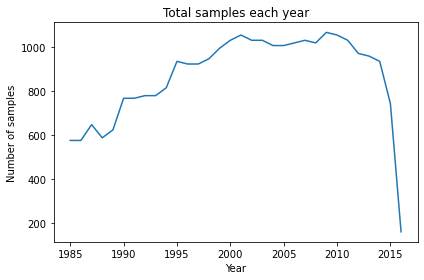

In [66]:
year_profiles_df = suicide_df.groupby(['year'])['year'].count()
plt.plot(year_profiles_df.keys(), year_profiles_df.values)
ax = plt.gca()
ax.set(title='Total samples each year', xlabel='Year', ylabel='Number of samples')
plt.tight_layout()

Vào năm 2016, lượng thông tin thu thập được thấp một cách bất thường, cần xem xét để được loại bỏ.

---

### Trường hợp các quốc gia có năm tỉ lệ tự tử bằng không

Trong dữ liệu trên, có những quốc gia một số năm tỉ lệ tự tử bằng không, dễ cho ta cảm giác không hợp lý, ta cần kiểm tra xem, những năm còn lại thu thập được tại quốc gia đó có tỉ lệ này như thế nào, nếu mà độ chênh lệch quá lớn, thì ta có thể xem đây là thông tin gây nhiễu.

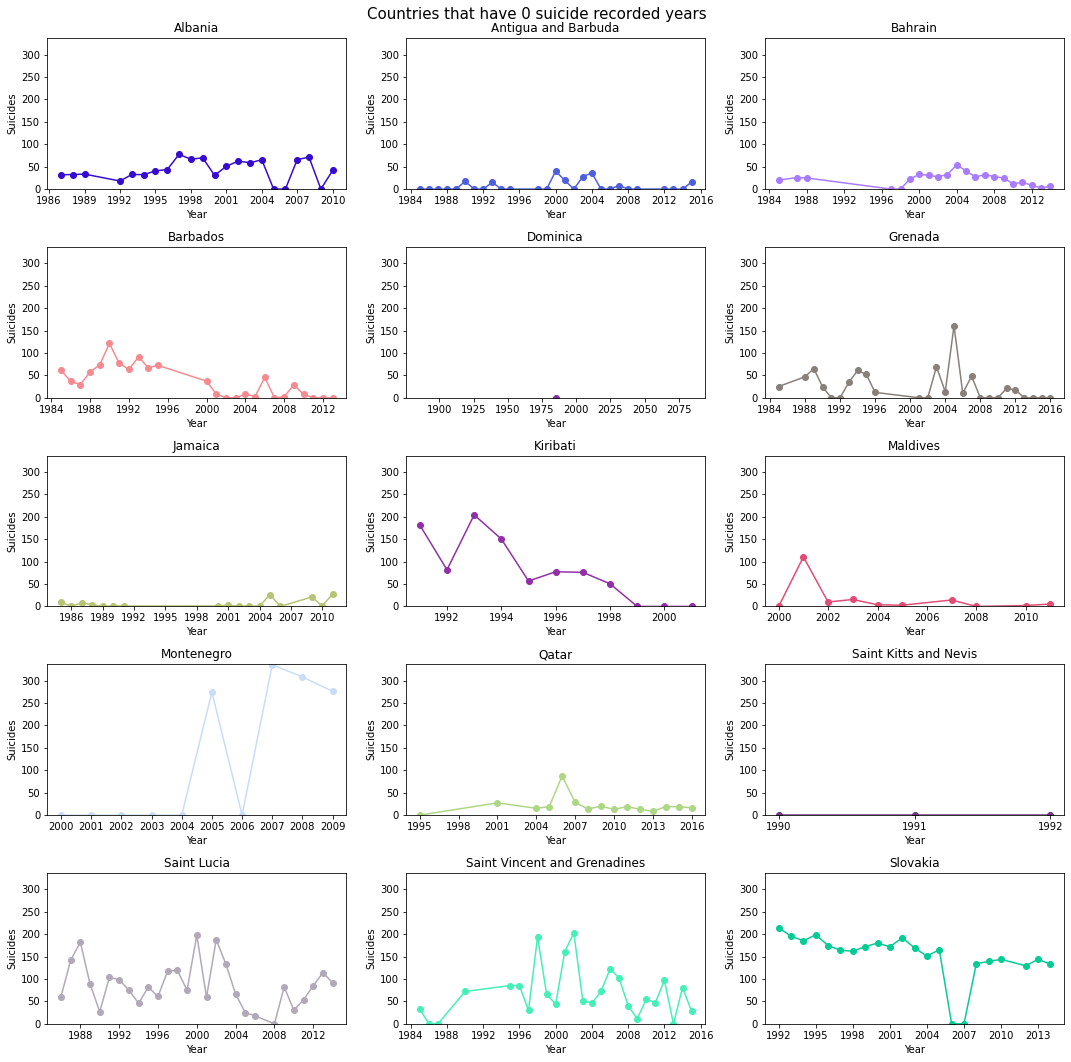

In [67]:
suicides_by_country_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
zero_suicide_countries = suicides_by_country_df[suicides_by_country_df == 0].\
                            index.get_level_values('country').unique().tolist()
suicides_by_country_df = suicides_by_country_df.loc[suicides_by_country_df.\
                            index.get_level_values('country').isin(zero_suicide_countries)]
draw_graph(len(zero_suicide_countries), suicides_by_country_df, zero_suicide_countries, 'Countries that have 0 suicide recorded years')

Từ biểu đồ trên, hầu hết những năm không có ca tự tử nào lại có số ca tự tử rất cao, đến mức có thể xem là vô lí cho nên ta tạm kết luận những năm có số ca tự tử là 0 có nghĩa là quá trình thu thập thông tin của năm đó có vấn đề.

---

### Trường hợp những quốc gia có ít mẫu thu thập được

Ta sẽ lấy 10% các quốc gia có số mẫu thu thập ít nhất để đánh giá, các quốc gia ấy sẽ được lưu vào `fewest_samples_countries`.

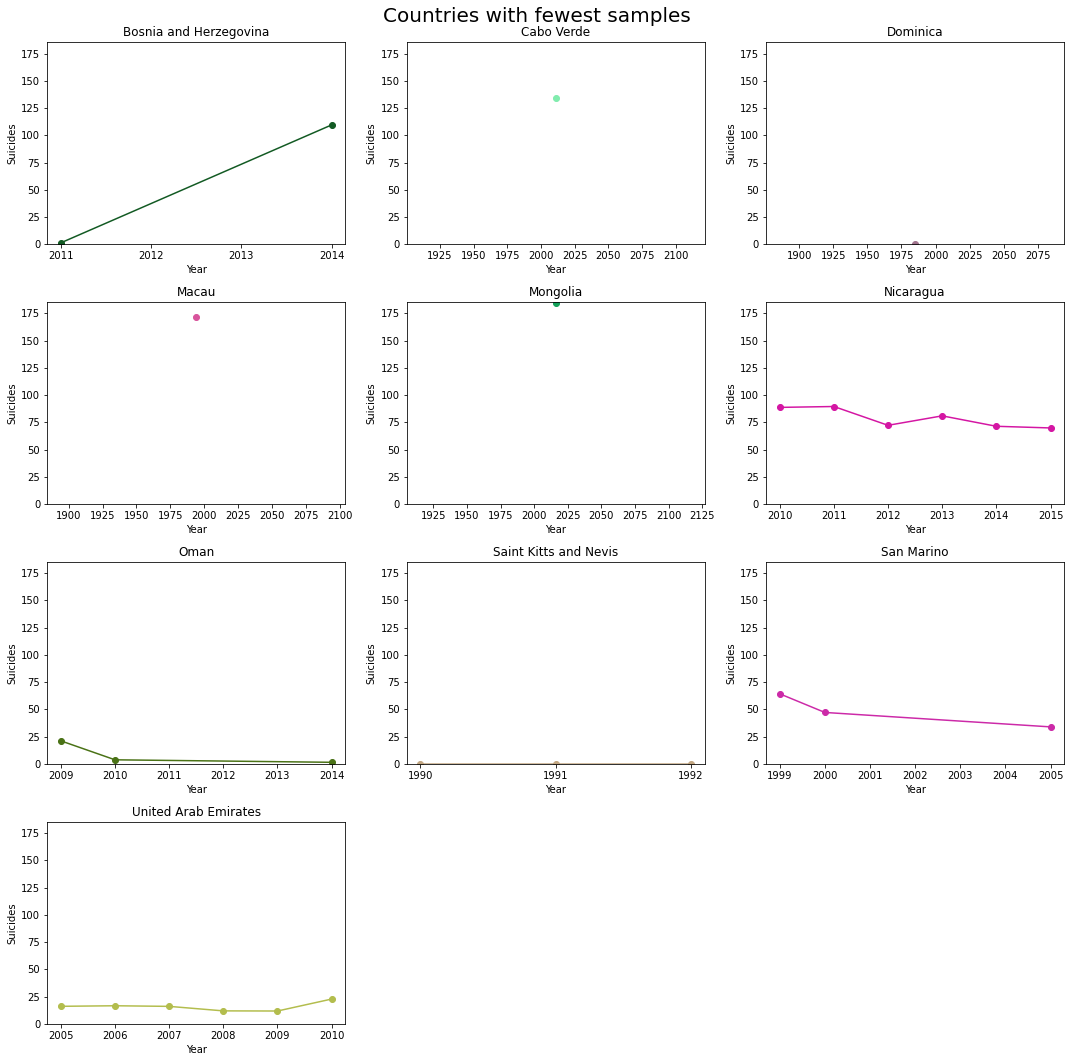

In [70]:
p = [10]
records_df = suicide_df.groupby(['country', 'year'])['year']\
                       .count().unstack(1).apply([pd.Series.sum], axis=1)
records_df = records_df.unstack(1)[('sum')]
records_df=records_df.to_frame(name='total_samples')
partition = np.percentile(records_df['total_samples'], q=p)[0]
fewest_samples_countries = records_df[records_df['total_samples'] < partition].index
suicides_by_country_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
suicides_by_country_df = suicides_by_country_df.loc[suicides_by_country_df.\
                            index.get_level_values('country').isin(fewest_samples_countries)]
draw_graph(len(least_recorded_countries), suicides_by_country_df, fewest_samples_countries, 'Countries with fewest samples')

Với các quốc gia chỉ có 2 hoặc 3 mẫu dữ liệu, thì không hề cho ta biết được xu hướng của tỉ lệ tử vong tại nước này diễn ra như thế nào, các quốc gia còn lại tuy dễ hình dung hơn, tuy nhiên, vì lượng dữ liệu quá ít nên hiện tại (2021), mọi thứ rất có thể đã thay đổi hoàn toàn khác so với biểu đồ trên.

## Tiền xử lý (tiếp tục)

### Xóa các mẫu thuộc năm 2016

In [15]:
year_2016_idx = suicide_df[suicide_df['year'] == 2016].index
suicide_df.drop(index=year_2016_idx, inplace=True)

In [16]:
suicide_df[suicide_df['year'] == 2016]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation


### Xóa những năm mà quốc gia đó không có ca tự tử nào

In [17]:
suicides_by_country_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
zero_suicide_year_by_country = list(suicides_by_country_df[suicides_by_country_df == 0].index)
for country, year in zero_suicide_year_by_country:
    indices = suicide_df[(suicide_df['country'] == country) & (suicide_df['year'] == year)].index
    suicide_df.drop(indices, axis=0, inplace=True)

In [18]:
updated_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
updated_df[updated_df == 0]

Series([], Name: suicides/100k pop, dtype: float64)

### Loại bỏ top 10% các quốc gia có số mẫu thu thập ít nhất

Loại bỏ các quốc gia đã được lưu vào `fewest_samples_countries` trong quá trình khám phá dữ liệu.

In [71]:
fewest_samples_indices = suicide_df[suicide_df['country'].isin(fewest_samples_countries)].index
suicide_df.drop(index=fewest_samples_indices, inplace=True)
suicide_df[suicide_df['country'].isin(fewest_samples_countries)]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation


## Phân tích dữ liệu để trả lời các câu hỏi trên

###  Xu hướng tăng giảm của tỉ lệ tự tử trên từng quốc gia như thế nào đồng thời chỉ ra những quốc gia đứng top.

#### Xu hướng chung của các quốc gia.

Đối với từng quốc gia, ta sẽ sử dụng đường hồi quy tuyến tính làm thước đo xu hướng tăng/giảm tỉ lệ tự tử, sau đó sẽ lưu các giá trị này vào `suicide_trend_df`.

In [20]:
avg_suicides_by_country_df = suicide_df.groupby(['country', 'year'])['suicides/100k pop'].mean().unstack(1)
countries = np.unique(suicide_df['country'].values)
suicide_trend_df = pd.DataFrame(columns=['intercept', 'bias'])

years = np.array(avg_suicides_by_country_df.columns)
for country in countries:
    suicides = np.array(avg_suicides_by_country_df.loc[country].values)
    idx = np.isfinite(suicides)
    coef = np.polyfit(years[idx], suicides[idx], 1)
    suicide_trend_df.loc[country, ['intercept', 'bias']] = coef 
    
suicide_trend_df = suicide_trend_df.sort_values(by=['intercept'], ascending=False)
suicide_trend_df.head()

,intercept,bias
Republic of Korea,1.22362,-2422.11
Guyana,0.963986,-1906.29
Suriname,0.448232,-875.115
Cyprus,0.308838,-616.959
Uruguay,0.262447,-505.488


Trực quan xu hướng tăng/giảm tỉ lệ tự tử của các quốc gia.

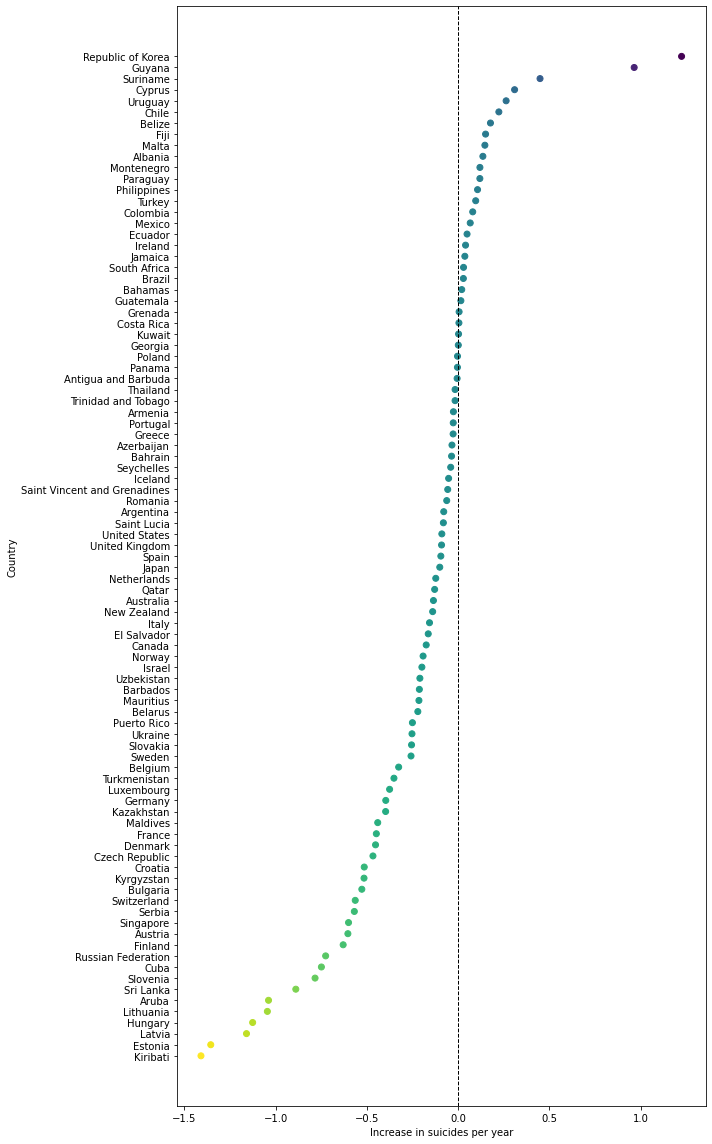

In [21]:
fig, ax = plt.subplots(figsize=(10, 16))
countries, increase_in_suicides = suicide_trend_df.index, suicide_trend_df.loc[:,'intercept']
ax.scatter(increase_in_suicides, countries, c= -1 * increase_in_suicides)
ax.axvline(0, color='k', linestyle='dashed', linewidth=1)
ax.set(xlabel='Increase in suicides per year', ylabel='Country')
ax.invert_yaxis()
plt.tight_layout()

In [22]:
print(f'Biểu đồ trên thể hiện xu hướng tăng giảm tỉ lệ tử vong của {len(suicide_trend_df)} quốc gia.')
print(f"Trong đó gồm {len(suicide_trend_df[suicide_trend_df['intercept'] > 0])} quốc gia có tỉ lệ này "
      f"tăng dần qua từng năm và {len(suicide_trend_df[suicide_trend_df['intercept'] < 0])} quốc gia giảm dần theo từng năm.")
print("Có thể xem đây là dấu hiệu tích cực.")

Biểu đồ trên thể hiện xu hướng tăng giảm tỉ lệ tử vong của 91 quốc gia.
Trong đó gồm 27 quốc gia có tỉ lệ này tăng dần qua từng năm và 64 quốc gia giảm dần theo từng năm.
Có thể xem đây là dấu hiệu tích cực.


---

#### Lấy các quốc gia top đầu xu hướng.

In [73]:
def draw_trending_countries(num_graphs, countries, title):
    fig, ax = plt.subplots(int(math.ceil(num_graphs/3)), 3, figsize=(15,8))
    colors = np.random.rand(num_graphs, 3)
    years = np.array(avg_suicides_by_country_df.columns)
    fig.suptitle(title, fontsize=25)
    for index, country in enumerate(countries):
        row, col = int(index / 3), index % 3
        suicides = np.array(avg_suicides_by_country_df.loc[country].values)
        intercept, bias = suicide_trend_df.loc[country,['intercept','bias']]
        ax[row, col].plot(years, suicides, 'o', years, intercept * years + bias, '--k', color=colors[index])
        ax[row, col].set_ylim((0, 60))
       
        ax[row, col].set(title=country, xlabel='Year', ylabel='Suicides')
    plt.tight_layout()

Ta sẽ lần lượt lấy top 6 các nước có tỉ lệ tăng/giảm tỉ lệ tự tử cao nhất.

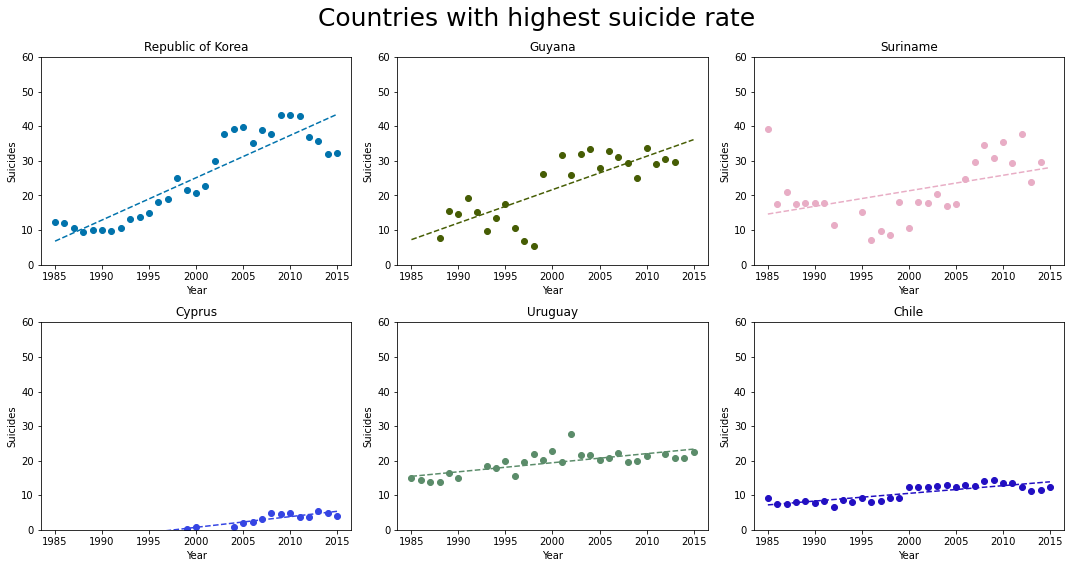

In [74]:
top_increasing_countries = suicide_trend_df[:6].index
draw_trending_countries(6, top_increasing_countries, 'Countries with highest suicide rate')

- Hàn Quốc tăng mạnh nhất trong tất cả, trung bình 1.2 người qua từng năm, ở những năm gần đây nhất thì có xu hướng đi xuống.
- Guyana từ năm 1998 đến 1999 nhảy vọt lên khá nhiều, có thể quá trình thu thập ở năm này có lỗi chăng.
- Các nước còn lại dao động qua từng năm không lớn lắm, chủ yếu là tăng đều.

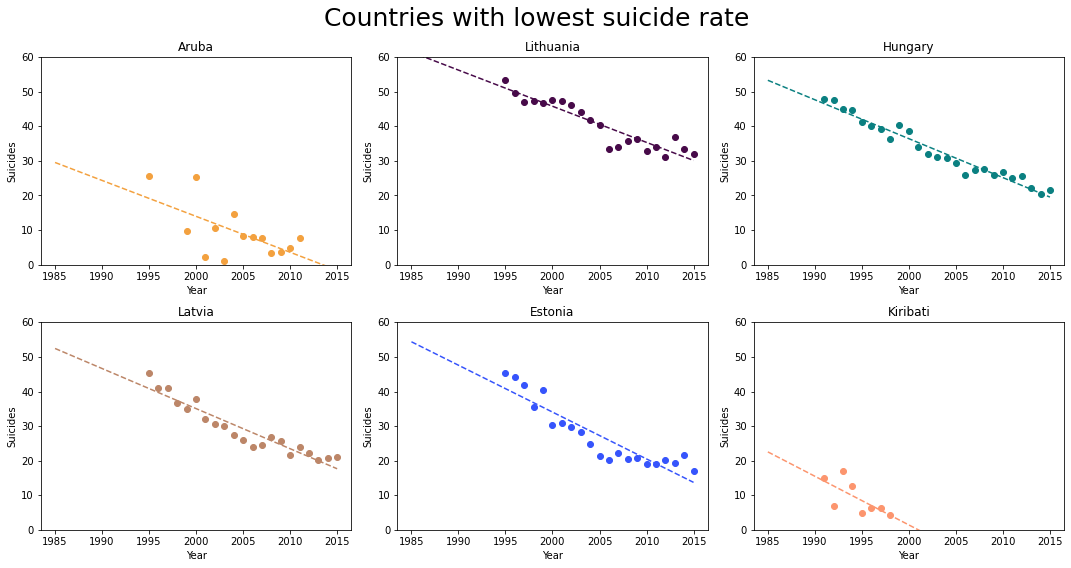

In [75]:
top_decreasing_countries = suicide_trend_df[-6:].index
draw_trending_countries(6, top_decreasing_countries, 'Countries with lowest suicide rate')

- Kiritabi giảm nhiều nhất, trung bình 1.4 người qua từng năm, tuy nhiên dữ liệu tại quốc gia này có vẻ hơi ít.
- Aruba dao động khá lớn, tiêu biểu là hai pha ngụp lặn vào 2000-2001 và 2003-2004.
- Các nước còn lại giảm đều theo thời gian.

### Liệu giàu có có giúp làm giảm tỷ lệ tự tử không?

#### Khảo sát tỷ lệ tự tử trên 100k  dân số và GDP per capita ( GDP theo sức mua tương đương) toàn cầu

In [26]:
data_df = suicide_df.groupby('year').agg({"gdp_per_capita":['mean'], "suicides/100k pop": ['mean']})
data_df.columns = ["gdp_per_capita", "suicide_rate"]

#chuẩn hóa về tỷ lệ so với giá trị max của cột
data_df['gdp_per_capita'] = data_df['gdp_per_capita']/data_df['gdp_per_capita'].max()
data_df["suicide_rate"] = data_df["suicide_rate"]/data_df["suicide_rate"].max()
data_df.reset_index()

data_df.head(11)

,gdp_per_capita,suicide_rate
year,,
1985,0.213322,0.767683
1986,0.249364,0.741531
1987,0.304369,0.752235
1988,0.343649,0.807111
1989,0.339265,0.833242
1990,0.337661,0.812893
1991,0.353914,0.877135
1992,0.366817,0.880364
1993,0.360782,0.860581


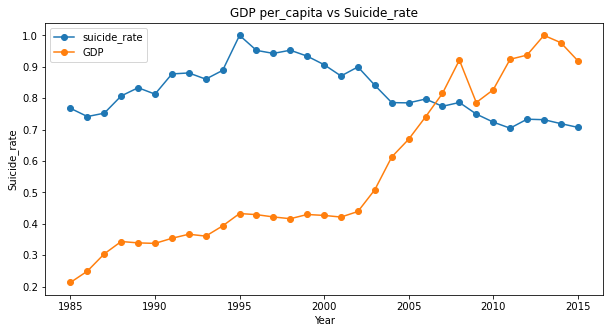

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data_df.index,data_df['suicide_rate'],marker='o',label='suicide_rate')
ax.plot(data_df.index,data_df['gdp_per_capita'],marker='o',label='GDP')


ax.set(title = "GDP per_capita vs Suicide_rate",
       xlabel = "Year",
       ylabel = "Suicide_rate")
ax.legend(['suicide_rate','GDP'])
plt.show()

=> Nhận xét: từ sau năm 1995, sau khi đạt đỉnh thì tỷ lệ tự tử trên 100k dân số đã giảm dẫn theo đà tăng của kinh tế.

=> Kinh tế phát triển, đời sống đi lên góp phần giảm thiểu số ca tự tử.



=> Khảo sát chung xu thế toàn cầu rồi, chúng ta thử xem trực quan mối quan hệ giữa tỷ lệ tự tử và GDP theo sức mua tương đương?

In [28]:
df = suicide_df.groupby(by=['country','year']).agg({'gdp_per_capita':'sum','suicides_no': 'sum'})
df.columns = ['GDP_per_capita','total_suicide']
df.reset_index(inplace=True)

df.tail(10)

,country,year,GDP_per_capita,total_suicide
2209,Uzbekistan,2002,5136,1576
2210,Uzbekistan,2003,5292,1416
2211,Uzbekistan,2004,6192,1251
2212,Uzbekistan,2005,7272,1221
2213,Uzbekistan,2009,15984,1399
2214,Uzbekistan,2010,18396,1464
2215,Uzbekistan,2011,21204,1640
2216,Uzbekistan,2012,23568,1835
2217,Uzbekistan,2013,25800,1950
2218,Uzbekistan,2014,27708,2095


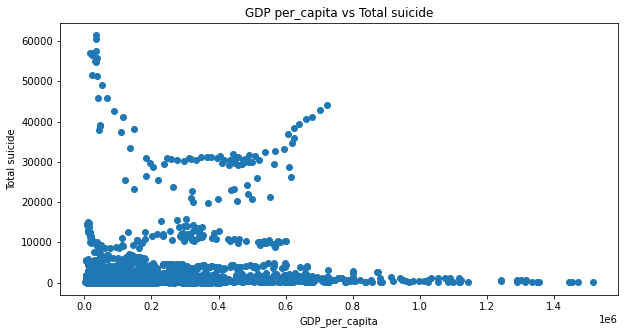

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['GDP_per_capita'],df['total_suicide'])
ax.set(title = "GDP per_capita vs Total suicide",
       xlabel = "GDP_per_capita",
       ylabel = "Total suicide")

plt.show()

=> Ta có thể nhìn thầy được: xu hướng chung những nước có GDP per capita theo năm thấp thì có số ca tự tử cao còn ngược lại những nước có GPD cao thì số ca tự tử lại thấp

=> Khảo sát xem 10 nước giàu nhất có gì khác với xu hướng chung không?

In [30]:
#1/ tìm 6 nước đứng đầu về kinh tế (GDP)( dễ hiển thị)
data_grp_gdp = suicide_df.groupby(['country']).agg({"suicides_no": ['sum']})
data_grp_gdp.columns = ["total_suicide"]
country=data_grp_gdp.sort_values('total_suicide',ascending=False).head(6).index
country=list(country)
country

['Russian Federation',
 'United States',
 'Japan',
 'France',
 'Ukraine',
 'Germany']

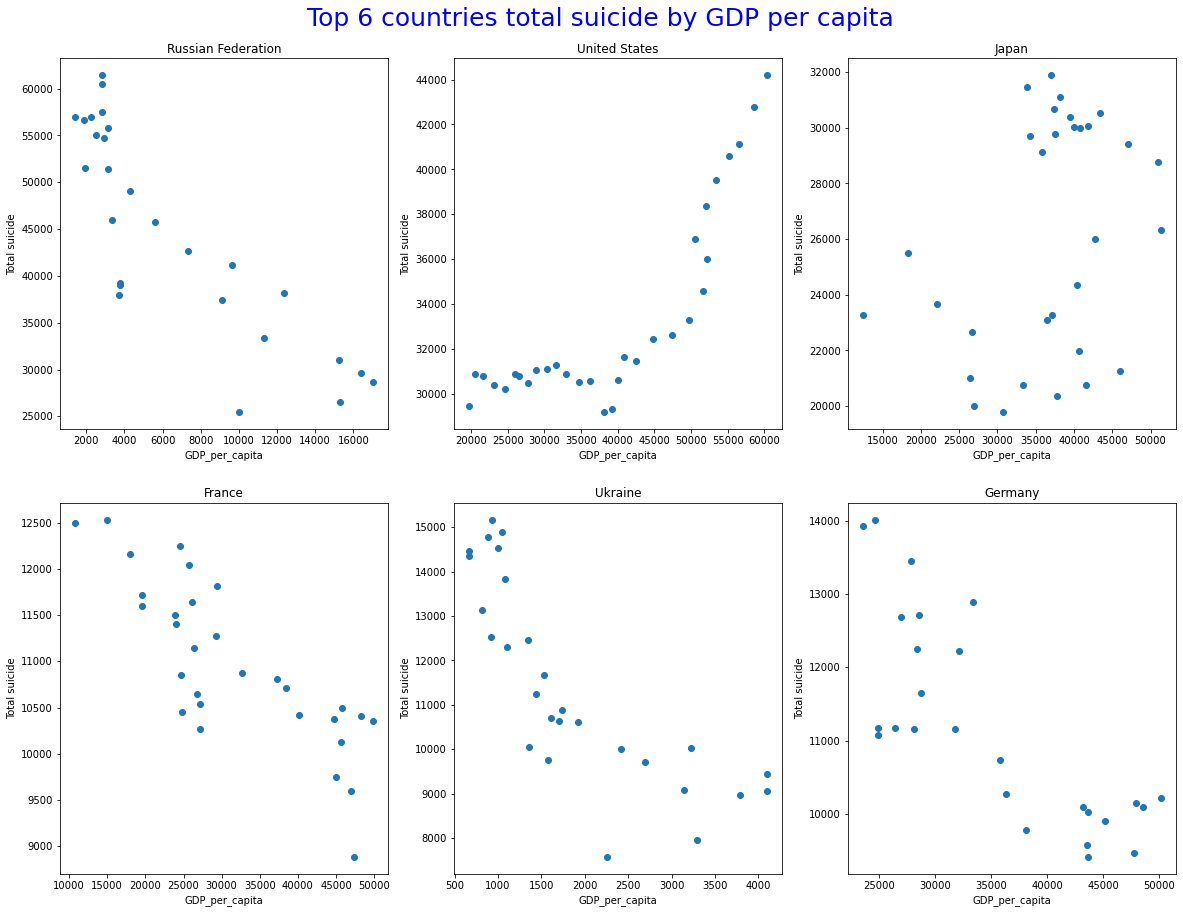

In [31]:
#2/ xem xét sự thay đổi về số ca và GPD_per_capita theo từng năm của các nước đã nói trên
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
for index, column in enumerate(country):
    row, col = int(index / 3), index % 3
    df = suicide_df.groupby(by=['country','year','gdp_per_capita']).agg({'suicides_no': 'sum'})
    df.columns = ["total_suicide"]
    df.reset_index(inplace=True)
    # data_grp_gdp
    df = df[df['country'] == column]
    ax[row,col].scatter(df['gdp_per_capita'],df['total_suicide'])
    ax[row,col].set(title = column,
       xlabel = "GDP_per_capita",
       ylabel = "Total suicide")
    
plt.figtext(.5,.91,'Top 6 countries total suicide by GDP per capita', color='b', fontsize=25, ha='center')
plt.show()

=> 4 nước khác đều có xu hướng chung giảm, riêng mỹ thì khi GDP per capita tăng thì tỷ lệ tự tử cũng tăng, một trường hợp đi ngược lại với xu hướng chung còn biểu đồ của nhật không nhìn thấy được xu hướng.

Chúng ta xem thử tình hình kinh tế và số ca tự tử ở nhật như thế nào?

<AxesSubplot:xlabel='year', ylabel='Total suicides'>

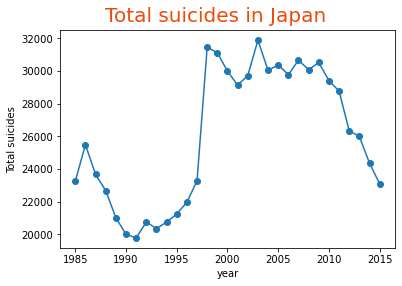

In [32]:
df=suicide_df.copy()
#df
df=df[df['country'] == 'Japan']
plt.figtext(.5,.91,'Total suicides in Japan  ', color='#ee4a09', fontsize=20, ha='center')
df=df.groupby(['year']).agg({'suicides_no': 'sum'})
df['suicides_no'].plot(marker='o',ylabel='Total suicides')

Nhận xét: Nhìn chung, thông qua các năm thì tổng số ca tự tử ở nhật cũng có chiều hướng giảm từ sau những năm 2000.

<AxesSubplot:xlabel='year', ylabel='Total suicides'>

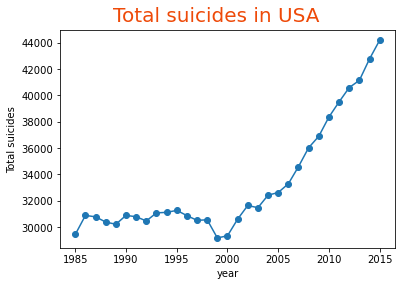

In [33]:
df=suicide_df.copy()

df=df[df['country'] == 'United States']

df=df.groupby(['year']).sum()

plt.figtext(.5,.91,'Total suicides in USA  ', color='#ee4a09', fontsize=20, ha='center')
df['suicides_no'].plot(marker='o',ylabel='Total suicides')

Nhận xét: tổng số ca tự tự ở mỹ luôn tăng từ sau những năm 2000. 

#### Kết luận: Nhìn chung với một nền kinh tế tốt hơn, người dân giàu có hơn, điều kiện cuộc sống tốt hơn thì tỷ lệ tự tử sẽ giảm đi.
Lý do: khi điều kiện cuộc sống đi lên, con người có điều kiện để chăm sóc cho sức khỏe tinh thần, thư giãn nhiều hơn. Một trong những nguyên nhân chính của tự tử.

### Giới tính nào có xu hướng tự tử nhiều hơn, hơn bao nhiêu lần?

#### Tính theo tổng số ca

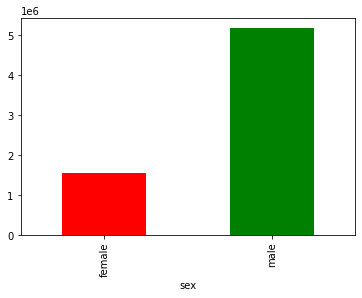

3.326875362863016

In [34]:
sex = suicide_df.groupby('sex')['suicides_no'].agg('sum')

sex.plot.bar(color=['red', 'green'])
plt.ylabel = 'total_suicides'
plt.show()
sex['male'] / sex['female']

=> Nếu xét về tổng số ca thì số ca tự tử ở nam hơn 3 lần số lần tự tự ở nữ.

#### Tính theo tỷ lệ số ca trên 100k dân theo từng năm

In [35]:
sex_by_year = suicide_df.groupby(['year','sex']).agg({'suicides/100k pop': ['sum']})
sex_by_year.columns = ['Suicide_rate']
sex_by_year.reset_index(inplace=True)

male_df=sex_by_year[sex_by_year['sex']=='male'][['year','Suicide_rate']]
female_df=sex_by_year[sex_by_year['sex']=='female'][['year','Suicide_rate']]

sex_by_year.head(10)

,year,sex,Suicide_rate
0,1985,female,1663.75
1,1985,male,5148.14
2,1986,female,1674.05
3,1986,male,4905.79
4,1987,female,1857.21
5,1987,male,5688.24
6,1988,female,1859.08
7,1988,male,5614.05
8,1989,female,1927.17
9,1989,male,6109.37


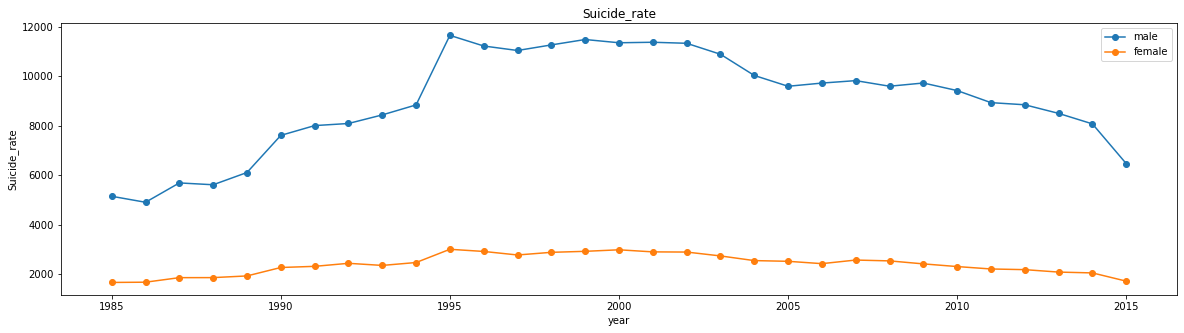

In [36]:
male_df=sex_by_year[sex_by_year['sex']=='male'][['year','Suicide_rate']]
female_df=sex_by_year[sex_by_year['sex']=='female'][['year','Suicide_rate']]

fig, ax = plt.subplots(figsize=(20, 5))


ax.plot(male_df['year'],male_df['Suicide_rate'],marker='o')
ax.plot(female_df['year'],female_df['Suicide_rate'],marker='o')

ax.set(title = "Suicide_rate",
       xlabel = "year",
       ylabel = "Suicide_rate")
plt.legend(['male','female'])
plt.show()

=> thấy một sự tăng cao bất thường về tỷ lệ tự tử của nam và nữ trên 100k dân số vào năm 1995.

In [37]:
#tính tỷ lệ số ca tự tử trên 100k dân số giữa 2 giới tính theo từng năm.
male_df=male_df.set_index('year')
female_df=female_df.set_index('year')
index_max=male_df/female_df
index_max.sort_values('Suicide_rate',ascending=False).head(10)

,Suicide_rate
year,
2010,4.085919
2013,4.081129
2012,4.056559
2011,4.045729
2009,4.029311
2006,4.012608
1997,3.980852
2003,3.980786
2014,3.940765


#### Xem thử tỷ lệ tự tự giữa nam và nữa khác nhau giữa các quốc gia như thế 

In [38]:
# tính toán tỷ lệ tự tử của các quốc gia trên 100k dân
sex_by_country = suicide_df.groupby(['country', 'sex']).agg({'suicides/100k pop': ['sum']})
sex_by_country.columns = ['Suicide_rate']
sex_by_country.reset_index(inplace=True)
sex_by_country=sex_by_country.sort_values('Suicide_rate',ascending=False)


male_df=sex_by_country[sex_by_country['sex']=='male'][['country','Suicide_rate']]
female_df=sex_by_country[sex_by_country['sex']=='female'][['country','Suicide_rate']]

male_df=male_df.set_index('country')
female_df=female_df.set_index('country')
index=male_df/female_df

In [39]:
# tính top10 cao nhât 
index.sort_values('Suicide_rate',ascending=False).head(10)

,Suicide_rate
country,
Saint Vincent and Grenadines,15.031848
Seychelles,14.149555
Antigua and Barbuda,10.468630
Puerto Rico,10.024001
Belize,7.549044
Costa Rica,7.234884
Mexico,6.577301
Grenada,6.553422
Chile,6.384413


In [40]:
#top10 thấp nhất
index.sort_values('Suicide_rate',ascending=False).tail(10)

,Suicide_rate
country,
Sweden,2.666906
Azerbaijan,2.622166
Montenegro,2.537447
Republic of Korea,2.393833
Netherlands,2.299767
Japan,2.151054
Albania,1.899116
Singapore,1.690847
Kuwait,1.302860


#### Tính theo từng độ tuổi

In [41]:
# Tính tỷ lệ tự tử phân theo độ tuổi và giới tính
sex_by_age = suicide_df.groupby(['age', 'sex']).agg({'suicides_no': ['sum']})
sex_by_age.columns = ['Total suicides']
sex_by_age.reset_index(inplace=True)
sex_by_age.head(5)

,age,sex,Total suicides
0,15-24 years,female,174928
1,15-24 years,male,631591
2,25-34 years,female,208312
3,25-34 years,male,912674
4,35-54 years,female,504875


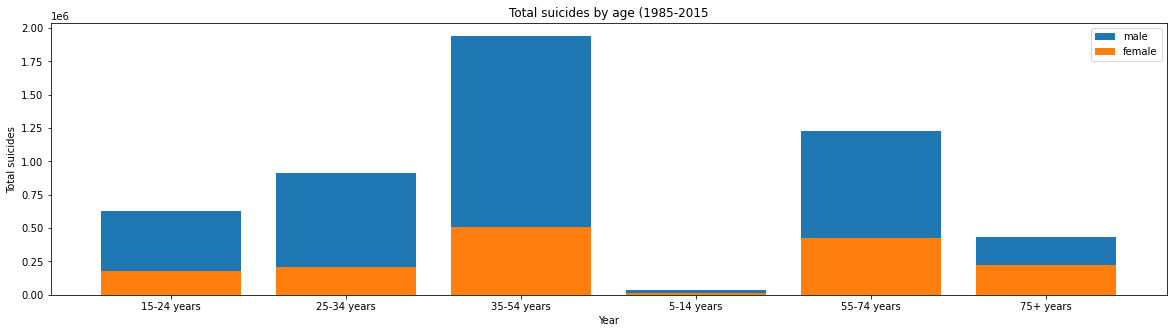

In [42]:
# tỷ lệ tự tử phân theo giới
male_df=sex_by_age[sex_by_age['sex']=='male'][['age','Total suicides']]
female_df=sex_by_age[sex_by_age['sex']=='female'][['age','Total suicides']]

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(male_df['age'],male_df['Total suicides'])
ax.bar(female_df['age'],female_df['Total suicides'])

ax.set(title = "Total suicides by age (1985-2015",
       xlabel = "Year",
       ylabel = "Total suicides")
plt.legend(['male','female'])
plt.show()


In [43]:
#tỷ lệ giới tính tự tử theo từng đọ tuổi là bao nhiêu.
male_df=male_df.set_index('age')
female_df=female_df.set_index('age')
index=male_df/female_df
index.sort_values('Total suicides',ascending=False)

,Total suicides
age,
25-34 years,4.381284
35-54 years,3.843797
15-24 years,3.610577
55-74 years,2.855360
5-14 years,2.079438
75+ years,1.940814


Nhận xét: Tính theo tổng số ca thì lứa tuổi 35-54, dù là nam hay nữ đều có xu hướng tự tử nhiều nhất.

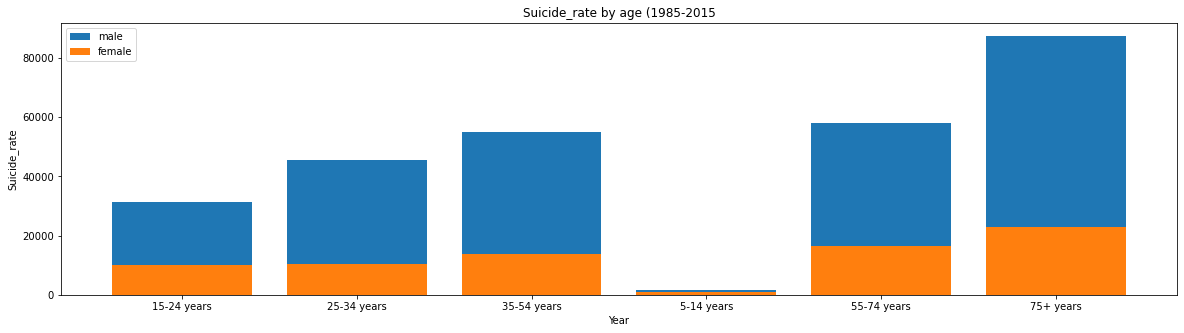

In [44]:
#tính tỷ lệ tự tử trên 100k 
sex_by_age = suicide_df.groupby(['age', 'sex']).agg({'suicides/100k pop': ['sum']})
sex_by_age.columns = ['Suicide_rate']
sex_by_age.reset_index(inplace=True)

male_df=sex_by_age[sex_by_age['sex']=='male'][['age','Suicide_rate']]
female_df=sex_by_age[sex_by_age['sex']=='female'][['age','Suicide_rate']]


fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(male_df['age'],male_df['Suicide_rate'])
ax.bar(female_df['age'],female_df['Suicide_rate'])

ax.set(title = "Suicide_rate by age (1985-2015",
       xlabel = "Year",
       ylabel = "Suicide_rate")
plt.legend(['male','female'])

plt.show()

In [45]:
#tỷ lệ giới tính tự tử theo từng đọ tuổi là bao nhiêu.
male_df=male_df.set_index('age')
female_df=female_df.set_index('age')
index=male_df/female_df
index.sort_values('Suicide_rate',ascending=False)

,Suicide_rate
age,
25-34 years,4.322812
35-54 years,4.047601
75+ years,3.825505
55-74 years,3.530721
15-24 years,3.133318
5-14 years,1.687563


Nhận xét: Tính theo tỷ lệ tự tử trên 100k dân thì ở lứa tuổi 75 , cả hai giới đều có tỷ lệ tự tử lớn nhất.

#### Kết luận: Nam có xu hướng tự tử ( thành công) nhiều hơn nữ từ 3-4 lần.

-Trong thực tế thì nữ lại có xu hướng tự tử nhiều hơn nam(1,2 lần). Nhưng nam lại có cách thức tự tử bạo lực hơn nên đa phần hoàn thành trước khi người ta kịp giải cứu. Bằng chứng là ở mỹ (6/10 khẩu súng được sở hữu bởi nam, và tự tử bằng súng chiếm 1/2 số ca tự tử ở nam).<sup>(2)(3)</sup>
       
-Theo lứa tuổi, hiện nay tổng số ca tự tự ở tuổi 35-54 là lớn nhất và có xu hướng ngày càng tăng do áp lực cuộc sống... Tỷ lệ tự tử ở người già 75+ đang là cao nhất vì thiếu sự quan tâm chăm sóc của con cháu ( ở nhiều nước phát triển) và sự cô đơn tuổi già.

## Nhìn lại quá trình làm đồ án

### Thành viên: Nguyễn Trần Công Huy

1. Khó khăn:
- Hạn chế khả năng code khi dùng numpy và pandas, một số trường hợp phải trở về với vòng lặp để xử lý.
- Thiếu kinh nghiệm trong việc tìm kiếm một bộ dữ liệu chất lượng, dẫn đến việc mất thời gian trong giai đoạn đầu không quyết định được nên chọn bộ nào.
- Việc tìm ra các câu hỏi có ý nghĩa khó hơn dự tính.
2. Những thứ đã học được:
- Cách trực quan dữ liệu với kiến thức toán hồi quy tuyến tính.
- Biết thêm và ứng dụng được một số hàm trong pandas và numpy.

### Thành viên: Hoàng Huy Lịch

1. Khó khăn:
- Bị giới hạn về thời gian và kiến thức.
- Dữ liệu đa dạng muôn màu muôn vẻ nhưng khó khăn để tìm được câu hỏi có ý nghĩa từ đó.
2. Những thứ đã học được:
- Rèn luyện kĩ năng được học trong môn học thành thạo hơn về git.
- Trải nghiệm tốt hơn về quy trình, khó khăn của dự án phân tích dữ liệu.
- Cảm thấy mình đã thành thạo hơn với các công cụ numpy, pandas và matplotlib.pyplt.

## Tài liệu tham khảo

1. Format notebook từ HW3
2. https://en.wikipedia.org/wiki/Suicide 
3. https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women
4. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
5. https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/code?datasetId=85351&sortBy=voteCount